# Projects in AI & ML HW 3

### Dataset

In your project, you will pick a dataset (not the same as in the previous homeworks) and 
describe the problem you would like to solve. Include a link to the dataset source. It is highly recommended that you pick a dataset with at least 10,000 (or more observations. There are many ways of describing a big dataset and one way to describe it is – a big dataset is more complex. Complexity can refer to the number of observations, features, or the type of data. For this project, there is no restriction to the number of features your dataset has. However, having more features gives you greater ability to apply the techniques discussed in class. Next, you should pick a Deep Learning Framework that you would like to use to implement your 2-layer Neural Network. 


This time, I chose [this dataset](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset) called 'Bank Customer Churn Dataset'. The dataset is composed of various features about the bank cusomter such as their location, credit score, amount stored etc. The label is the 'chrun' column which shows whether that customer stopped using the bank's service. I chose this dataset because I felt that there could be a complex relationship here that could be learned well by MLP, as well as the fact that it has 60K data points.

In [435]:
# same deal for gdrive and kaggle
from google.colab import drive
drive.mount('/content/drive')

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/.kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle


# download 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [436]:
# install dataset and unzip

!rm -r dataset
!kaggle datasets download -d gauravtopre/bank-customer-churn-dataset
!mkdir dataset
!unzip bank-customer-churn-dataset.zip -d dataset

bank-customer-churn-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bank-customer-churn-dataset.zip
  inflating: dataset/Bank Customer Churn Prediction.csv  


In [437]:
# cool library i found for live loss plotting

!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Task 1 (10 points): 

Assuming you are not familiar with the framework, in this part of the homework you will present your research describing the resources you used to learn the framework (must include links to all resources). Clearly explain why you needed a particular 
resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)
For example, some of the known resources for TensorFlow are:
https://www.tensorflow.org/guide/autodiff
https://www.tensorflow.org/api_docs/python/tf/GradientTape
Hint: You need to figure out the APIs/packages used to implement forward propagation and 
backward propagation. 

In this homework, I will be using the Pytorch library and its tools to implement a 2 layer neural network. I will implement the neural network class as a subclass of the Net module using Linear layers and various activation functions, such as RELU, softmax and cross entrophy to complete the neural network.

### Task 2 (60 points): 

Once you have figured the resources you need for the project, design, and 
implement your project. The project must include the following steps (it’s not limited to these 
steps):
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.
3. Implement forward propagation (clearly describe the activation functions and other hyper-parameters you are using).
4. Compute the final cost function.
5. Implement gradient descent (any variant of gradient descent depending upon your data and project can be used) to train your model. In this step it is up to you as someone in charge of their project to improvise using optimization algorithms (Adams, RMSProp etc.) and/or regularization.
6. Present the results using the test set.
NOTE: In this step, once you have implemented your 2-layer network you may increase and/or decrease the number of layers as part of the hyperparameter tuning process.



For this homework, I will be choosing the 'store sales' feature as the label variable. 

(10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(0.5, 0.98, 'Label value distribution')

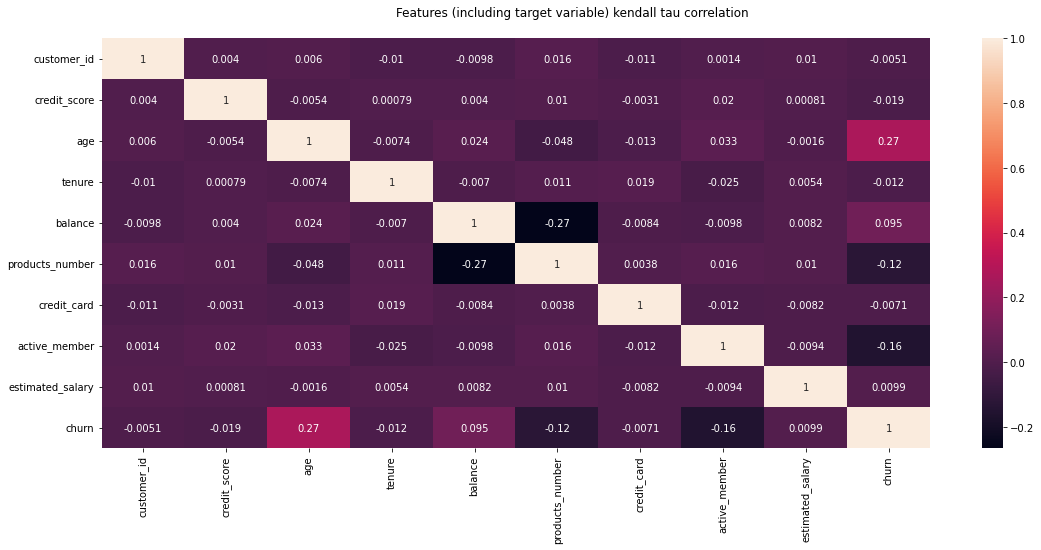

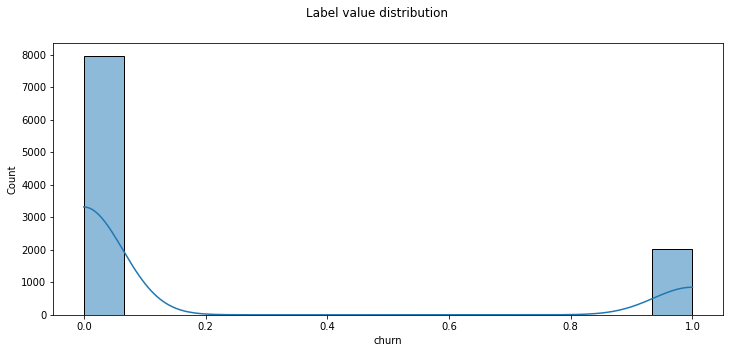

In [438]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# basic look at the dataset
raw_data = pd.read_csv('dataset/Bank Customer Churn Prediction.csv')
print(raw_data.shape)
display(raw_data.head())
display(raw_data.describe())

fig,ax = plt.subplots(figsize=(16,8))
# is it a good thing?? Low correlations accross many features but some seem to be highly correlated.. might have to prune features
sns.heatmap(raw_data.corr(method='kendall'),annot=True,ax=ax,)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Features (including target variable) kendall tau correlation')
fig.show()

# finally pop the y variable for separation
target_name = 'churn'

fig,ax = plt.subplots(figsize=(12,5))
sns.histplot(data=raw_data,x=target_name,ax=ax,kde=True)
fig.suptitle('Label value distribution')

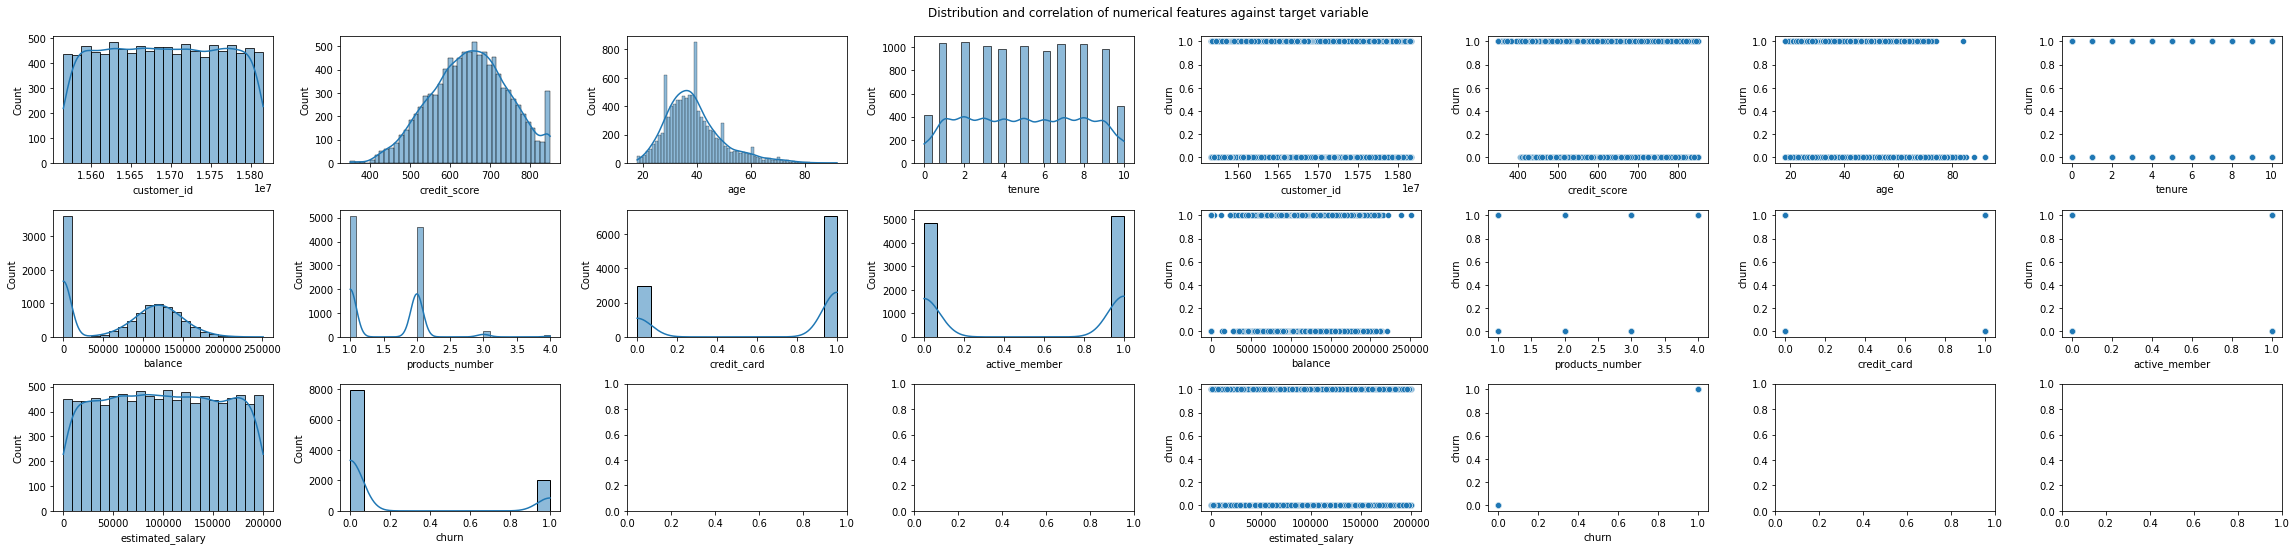

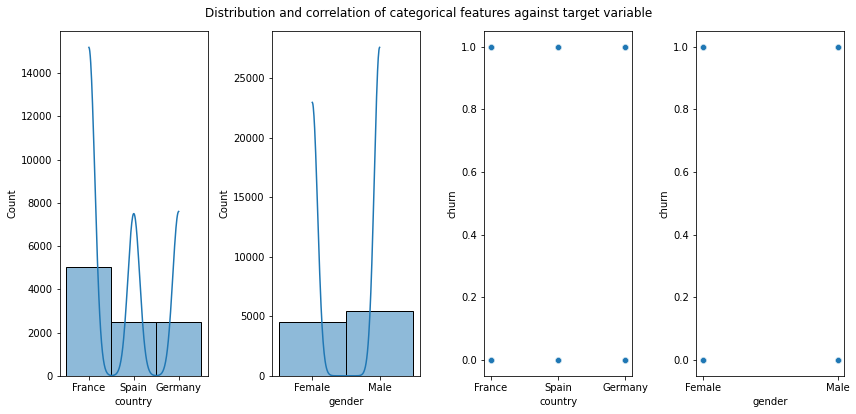

In [439]:
# feature selection

num_cols = raw_data.columns[raw_data.dtypes!='object'].tolist()
cat_cols = raw_data.columns[raw_data.dtypes=='object'].tolist()

# checking the distribution of features, we are seeing some good spread in most values except for a few that appear binary
fig,axes = plt.subplots(ncols=8,nrows=3,figsize=(32,8))
axes1 = axes[:,:4]
axes2 = axes[:,4:]
for i,col in enumerate(num_cols):
    sns.histplot(data=raw_data,x=col,ax = axes1.flatten()[i],kde=True)

# data = pd.DataFrame(np.hstack([raw_data[num_cols].values,y[:,None]]),columns=num_cols+['target_variable'])
for i,col in enumerate(num_cols):
    sns.scatterplot(data=raw_data,y=target_name,x=col,ax = axes2.flatten()[i])

fig.suptitle('Distribution and correlation of numerical features against target variable')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()


# now for categorical variables
fig,axes = plt.subplots(ncols=4,nrows=1,figsize=(12,6))
axes1 = axes[:2]
axes2 = axes[2:]
for i,col in enumerate(cat_cols):
    sns.histplot(data=raw_data,x=col,ax = axes1.flatten()[i],kde=True)

for i,col in enumerate(cat_cols):
    sns.scatterplot(data=raw_data,y=target_name,x=col,ax = axes2.flatten()[i])

fig.suptitle('Distribution and correlation of categorical features against target variable')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

In [440]:
# since most features seem to have an even distribution otherwise, we will keep them (and maybe change after some testing)
label = raw_data.pop(target_name).values.astype(int)



In [441]:
# preprocessing the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
np.random.seed(0)

# split needs to happen before normalization
X_train,X_test,y_train,y_test = train_test_split(raw_data,label,test_size=0.2,random_state=0)

# since some columns of the dataset are categorical variables, we need to encode them somehow for the NN

# handle numeric features
# fill nan values with median values and also scale
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("standard_scaler", StandardScaler()),('minmax_scaler',MinMaxScaler())]
)

# handle categorical features
# using 1-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="object")),
        ("cat", categorical_transformer, selector(dtype_include="object")),
    ]
)

# processed_data = preprocessor.fit_transform(raw_data)
X_train = preprocessor.fit_transform(X_train)
y_train = preprocessor.fit_transform(pd.DataFrame(y_train))[:,0]
X_test = preprocessor.fit_transform(X_test)
y_test = preprocessor.fit_transform(pd.DataFrame(y_test))[:,0]

# ensure features are same shape (because we are 1-hot encoding)
X_train.shape[1]== X_test.shape[1]

True

In [442]:
# ensure sane ranges for variables

X_train.min(),X_train.max(),y_train.min(),y_train.max(),np.unique(y_train,return_counts=True)

(0.0, 1.0000000000000002, 0.0, 1.0, (array([0., 1.]), array([6368, 1632])))

In [500]:
# seems to be some overfitting happening, we will resample the minority labels by adding duplicate rows

def oversample(X,y):
    labels,counts = np.unique(y,return_counts=True)
    majority = labels[counts==counts.max()][0]
    X_maj = X[y == majority]

    X_oversampled = []
    y_oversampled = []
    for l in set(labels) - { majority }:
        # print(l)
        idxs = np.where(y == l)[0]
        X_oversampled.append(
            X[np.hstack([idxs,np.random.choice(idxs,counts.max()-counts[labels==l])])]
        )
        y_oversampled.append(
            np.ones(counts.max()) * l
        )
        # break

    return (
        np.vstack([X_maj] + X_oversampled),
        np.hstack([np.ones(counts.max())*majority] + y_oversampled).astype(int)
    )


X_train,y_train = oversample(X_train,y_train)
X_test,y_test = oversample(X_test,y_test)


X_train.shape,y_train.shape,np.unique(y_train,return_counts=True),X_test.shape,y_test.shape,np.unique(y_test,return_counts=True)

((12736, 14),
 (12736,),
 (array([0, 1]), array([6368, 6368])),
 (3190, 14),
 (3190,),
 (array([0, 1]), array([1595, 1595])))

In [501]:
# now that data is parsed, load into pytorch for cuda caching

import torch
from torch.utils.data import Dataset,DataLoader

class StoreDataset(Dataset):
    def __init__(self,X,y,device='cuda'):
        # preloading the tensors onto cuda is much much faster in this case
        self.X = torch.tensor(X_train).float().to_sparse().to(device)
        self.y = torch.tensor(y).long().to(device)

    def __len__(self):
        return self.X.size(0)
    
    def __getitem__(self, idx):
        return self.X[idx],self.y[idx]

In [505]:
# implement our neural network here
import numpy as np
from torch import nn
import torch.nn.functional as F
from tqdm.auto import tqdm
from torch import optim
from livelossplot import PlotLosses
from sklearn.metrics import r2_score,f1_score,accuracy_score

class MLP(nn.Module):
    def __init__(self,input_shape,n_classes,layer_ratios=[1,1,1],device='cuda'):
        super(MLP, self).__init__()
        # 4 layers total. input, hl1, hl2, output
        self.layers = nn.Sequential(
            # input
            nn.Linear(input_shape,input_shape*layer_ratios[0]),
            # hidden
            *[
                # nn.Sequential(
                    nn.Linear(
                        input_shape*layer_ratios[i],
                        input_shape*layer_ratios[i+1]
                    )
                # )
                for i in range(len(layer_ratios)-1)
            ],
            # output
            nn.Linear(input_shape*layer_ratios[-1],n_classes),
        )
        self.device = device
        self.to(device)

    def forward(self, x):
        return F.softmax(self.layers(x),1)

    def fit(self,X,y,n_epoch = 200,batch_size=512,lr = 1e-3,weight_decay=1e-4,loss_func=nn.CrossEntropyLoss,extra_metrics=[accuracy_score,f1_score]):
        loader = DataLoader(StoreDataset(X,y,device=self.device), batch_size=1024, shuffle=True)

        optimizer = optim.Adam(self.parameters(), lr=lr,weight_decay=weight_decay)
        criterion = loss_func()

        liveloss = PlotLosses()
        for _ in range(n_epoch):
            # logs = {}
            all_losses = []
            y_real = []
            y_pred = []
            for x,y in tqdm(loader,desc='batching..',leave=False):
                x,y = x.to(self.device),y.to(self.device)
                optimizer.zero_grad()
                pred = model(x)
                loss = criterion(pred, y)
                loss.backward()
                optimizer.step() 

                all_losses.append(loss.item())
                y_real.append(y)
                y_pred.append(pred)

            all_real,all_pred = torch.hstack(y_real).detach().cpu(),torch.vstack(y_pred).detach().cpu().argmax(1)
            liveloss.update(dict(
                [
                    (loss_func.__name__, np.mean(all_losses))
                ] + [
                    (m.__name__,m(all_real,all_pred))
                    for m in extra_metrics
                ]
            ))
            liveloss.send()

### First testing out weight decay and learning rate

with the most classic setup of N-N-N-N shaped layers, I am first testing out different values of weight decay and learning rate, using 1e-3 as base value for learning rate, and 1e-4 for weight decay.

#### Classic 2 layer N-N-N-N setup
seems to be doing pretty good!
Overfitting was an issue before I oversampled the data, so I think it might be interesting to test out simpler configurations

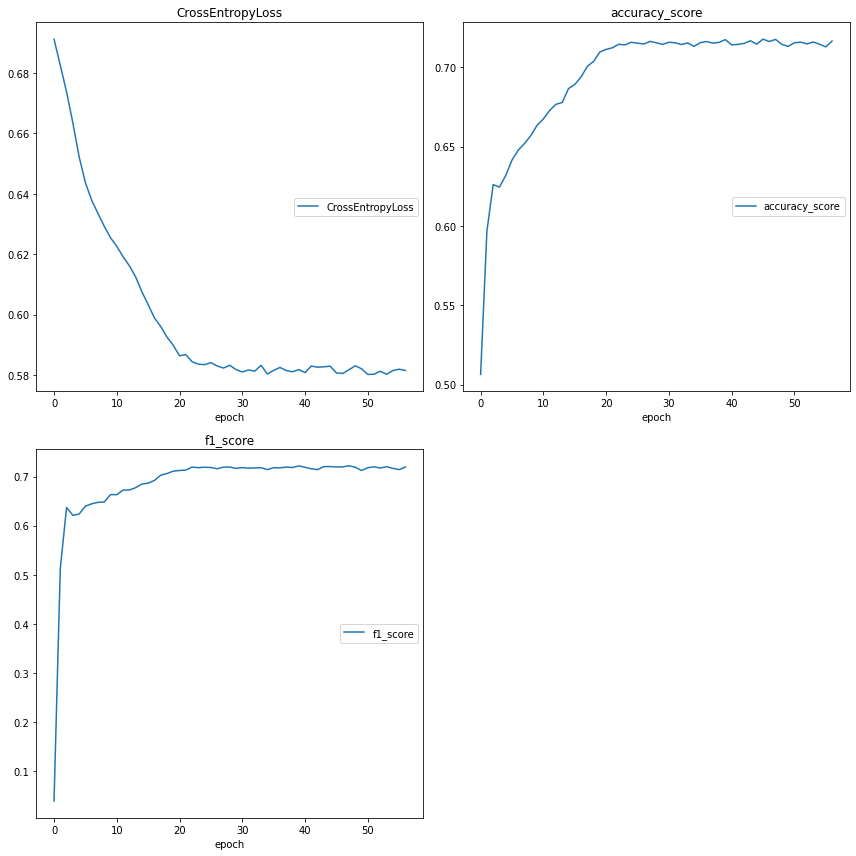

CrossEntropyLoss
	CrossEntropyLoss 	 (min:    0.580, max:    0.691, cur:    0.582)
accuracy_score
	accuracy_score   	 (min:    0.506, max:    0.718, cur:    0.716)
f1_score
	f1_score         	 (min:    0.039, max:    0.722, cur:    0.719)


batching..:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
model = MLP(X_train.shape[1],2,layer_ratios=[1,1,1],device='cuda')
model.fit(X_train,y_train)

In [ ]:
model = MLP(X_train.shape[1],2,layer_ratios=[1,1,1],device='cuda')
model.fit(X_train,y_train,weight_decay=0)

In [ ]:
model = MLP(X_train.shape[1],2,layer_ratios=[1,1,1],device='cuda')
model.fit(X_train,y_train,weight_decay=1e-2)

In [ ]:
model = MLP(X_train.shape[1],2,layer_ratios=[1,1,1],device='cuda')
model.fit(X_train,y_train,learning_rate=1e-1)

In [ ]:
model = MLP(X_train.shape[1],2,layer_ratios=[1,1,1],device='cuda')
model.fit(X_train,y_train,learning_rate=1e-5)

In [ ]:
model = MLP(X_train.shape[1],2,layer_ratios=[2,2,2],device='cuda')
model.fit(X_train,y_train,learning_rate=1e-1)

#### Now testing out different shapes of layers

In [ ]:
model = MLP(X_train.shape[1],2,layer_ratios=[1,1,1,1],device='cuda')
model.fit(X_train,y_train,learning_rate=1e-1)

In [ ]:
model = MLP(X_train.shape[1],2,layer_ratios=[1,1,1,1,1],device='cuda')
model.fit(X_train,y_train,learning_rate=1e-1)

Before oversampling the minority data, I was having some overfitting issues, even with the simplest 2 layer settings. 

In [355]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# LogisticRegression().fit(X_train,y_train).score(X_train,y_train)
# DecisionTreeClassifier(max_depth=1).fit(X_train,y_train).score(X_train,y_train)


pp = RandomForestRegressor(n_estimators=10,max_depth=5).fit(X_train,y_train).predict(X_test)

r2_score(y_test,pp)

0.8693669132108153

In [ ]:
output[:,0]

tensor([0.5061, 0.5054, 0.5040, 0.5069, 0.5090, 0.5052, 0.5060, 0.5059, 0.5075,
        0.5069, 0.5071, 0.5074, 0.5063, 0.5081, 0.5093, 0.5064, 0.5091, 0.5106,
        0.5070, 0.5058, 0.5067, 0.5067, 0.5101, 0.5057, 0.5098, 0.5061, 0.5061,
        0.5064, 0.5048, 0.5100, 0.5055, 0.5079, 0.5056, 0.5054, 0.5078, 0.5044,
        0.5051, 0.5083, 0.5028, 0.5076, 0.5089, 0.5077, 0.5076, 0.5095, 0.5080,
        0.5078, 0.5064, 0.5097, 0.5084, 0.5101, 0.5074, 0.5077, 0.5057, 0.5086,
        0.5052, 0.5076, 0.5078, 0.5072, 0.5068, 0.5032, 0.5096, 0.5092, 0.5093,
        0.5104], grad_fn=<SelectBackward0>)

### Task 3 (10 points): 

In task 2 describe how you selected the hyperparameters. What was the rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use 
an optimization algorithm? Why or why not?

I chose Adam optimizer for my neural network, because of its ability to provide some regularization. I tested around 


### Task 4 (20 points): 

Create another baseline model (can be any model we covered so far except a 
deep learning model). Using the same training data (as above) train your model and evaluate results using the test set. Compare the results of both models (the Neural Network and the baseline model). What are the reasons for one model performing better (or not) than the other? Explain.